# Центральная предельная теорема своими руками


Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 
Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.


Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:
код, генерирующий выборки и графики; 
краткие описания каждого блока кода, 
объясняющие, что он делает; 
необходимые графики (убедитесь, что на них подписаны оси); 
выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n; 
выводы по результатам выполнения задания.

## Распределе́ние Паре́то

Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных 
распределений, являющихся степенными. Называется по имени Вилфредо Парето. 
Встречается при исследовании различных явлений, в частности, социальных, экономических, физических 
и других[1]. Вне области экономики иногда называется также распределением Брэдфорда.

Bилфредо Парето изначально использовал это распределение для описания распределения благосостояния, 
а также распределения дохода[2]. Его правило 20 к 80 (которое гласит: 20 % популяции владеет 80 % богатства) 
однако зависит от конкретной величины k, и утверждается, что фактически встречаются существенные 
количественные отклонения, например, данные самого Парето по Британии в Cours d'économie politique 
говорят, что там примерно 30 % населения владеет 70 % общего дохода.


http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto

https://en.wikipedia.org/wiki/Pareto_distribution

In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
import scipy.stats as sts
%matplotlib inline

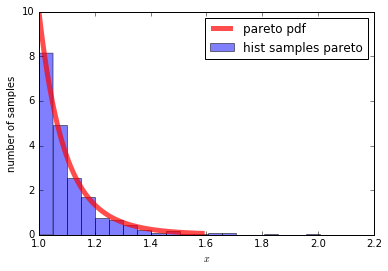

In [43]:
# Выбор параметров для распределения
k = 10
#Сгенерируйте из него выборку объёма 1000
sampleRange = pareto.rvs(k, size=1000)
#Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.
plt.hist(sampleRange, normed=True, bins=20, alpha=0.5, label='hist samples pareto')
plt.ylabel('number of samples')
plt.xlabel('$x$')

#теоретическая плотность распределения случайной величины
left = pareto.ppf(0.01, k)
right =  pareto.ppf(0.99, k)
x = np.linspace(left,  right, 100)
plt.plot(x, pareto.pdf(x, k), 'r-', lw=5, alpha=0.7, label='pareto pdf')
plt.legend(loc='best')

In [57]:
# функция построения гистограммы распределений выборочных средних 
# и плотности соответствующего нормального распределения 
# sizeSamples - выбороки объёма n
def paretoF(sizeSamples, Ex, Dx):
    n = sizeSamples
    #генерация выборок
    values = np.array([ pareto.rvs(k, size=n) for x in range(1000)])
    #вычисление выборочных средних
    meanVal = values.mean(axis = 1)
    plt.hist(meanVal, normed=True, alpha=0.5, label='hist mean n ' + str(n))
    
    #мат. ожидание м sigma нормального распределения
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print 'мат. ожидание=' , mu
    print 'sigma=' , sigma
    # зададим нормальное распределенние
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0.5,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='pareto pdf n ' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

In [58]:
#Вычисление теоритических EX, std, DX  распределения
EX = pareto.mean(k)
std = pareto.std(k)
DX = std**2
print 'Ex=', EX, ' STD=', std, ' DX=', DX

Ex= 1.11111111111  STD= 0.12422599875  DX= 0.0154320987654


мат. ожидание= 1.11111111111
sigma= 0.0555555555556


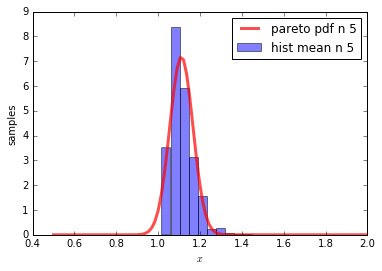

In [59]:
paretoF(5, EX, DX)

мат. ожидание= 1.11111111111
sigma= 0.0392837100659


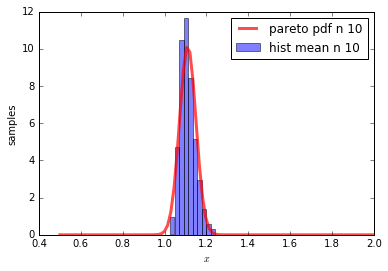

In [60]:
paretoF(10, EX, DX)

мат. ожидание= 1.11111111111
sigma= 0.0175682092232


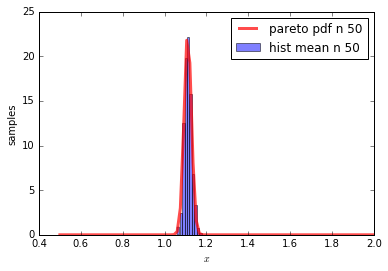

In [61]:
paretoF(50, EX, DX)

## Вывод: 
Распределение выборочных средних для функции pareto хорошо описывается нормальным распределением.
С ростом n точность аппроксимации увеличивается.